##  **Import libraries**

In [1]:
import pandas as pd # data manipulation
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plots
import seaborn as sns # plots
import warnings # Ignore warning messages

In [2]:
warnings.filterwarnings("ignore")

### **Load Data**

In [3]:
df=pd.read_csv("insurance.csv")

Using the histogram and the box plot. We confirm the presence of outliers. So we have to give it special processing.

Technically we can give outliers the same treatment as missing values.

* **Delete** those values.
* **Replace** them with a **statistical measure** or by any other value that is in a suitable range.
* **Add** new variables, as we mentioned in the EDA.

## **Feature engineering**

In [4]:
class Intervals():
    
    def __init__(self,feature):
        
        
        self.mean=feature.mean()
        self.sd=feature.std()
        self.interval_range=[1.5,2,2.5,3.0,3.5,4]
        
    def Upper_Interval(self):
        
        for interval in self.interval_range:
            
            upper_interval= self.mean+interval*self.sd
            upper_interval=round(upper_interval,2)
            
            print(f"Interval range {interval}: {upper_interval}")
        
    def Lower_Interval(self):
        
         for interval in self.interval_range:
            
            lower_interval=self.mean-interval*self.sd
            lower_interval=round(lower_interval,2)
            
            print(f"Interval range {interval}: {lower_interval}")
        

We create a class called intervals that have functions that will allow us to make it easier to find the best ideal interval.

In [5]:
     
class Best_Interval(Intervals):
    
    def __init__(self,feature):
        Intervals.__init__(self,feature)
    
    def Upper_Interval_Ideal(self):
        
        return super().Upper_Interval()
    
    def Lower_Interval_Ideal(self):
        
        return super().Lower_Interval()

We apply a technique in OOP(Object-oriented programming) to make the code easier to understand. We apply inheritance so that the parent class (Intervals) passes attributes and functions to the child class (Best_Intervals).

#### *Selected from the best interval*

In [6]:
bmi_interval_ideal=Best_Interval(df["bmi"])

### **Upper limit BMI**

In [7]:
bmi_interval_ideal.Upper_Interval_Ideal()

Interval range 1.5: 39.81
Interval range 2: 42.86
Interval range 2.5: 45.91
Interval range 3.0: 48.96
Interval range 3.5: 52.01
Interval range 4: 55.06


With an interval of 3 it gives a good value. To be able to replace outliers.

### *Replaces values greater than the upper range*

In [8]:
df["bmi"]=np.where(df["bmi"]>48.95,48.95,df["bmi"])

### **Lower limit BMI**

In [9]:
bmi_interval_ideal.Lower_Interval_Ideal()

Interval range 1.5: 21.52
Interval range 2: 18.47
Interval range 2.5: 15.42
Interval range 3.0: 12.37
Interval range 3.5: 9.32
Interval range 4: 6.27


The appropriate interval value is 2. Since considered with the minimum BMI values ​​regardless of sex is 18.

### *Replaces values greater than the lower range*

In [10]:
df["bmi"]=np.where(df["bmi"]<18,18,df["bmi"])

In [11]:
sns.set_style(style="whitegrid")

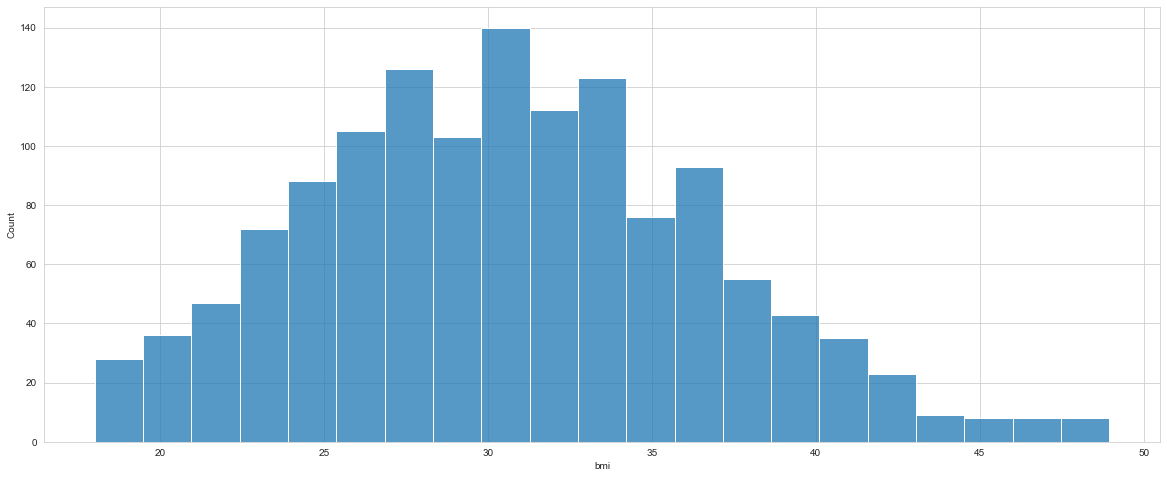

In [12]:
plt.subplots(1,1,figsize=(20,8))
sns.histplot(data=df,x="bmi")
plt.show()

#### *Separate into smokers and non-smokers*

In [13]:
smoker_no_split=df.query("smoker=='no'")
smoker_yes_split=df.query("smoker=='yes'")

In order to give a better treatment to the data.

### **Smoker no split**

#### **Upper limit Charges**

In [14]:
charges_interval_ideal=Best_Interval(smoker_no_split["charges"])

In [15]:
charges_interval_ideal.Upper_Interval_Ideal()

Interval range 1.5: 17424.94
Interval range 2: 20421.83
Interval range 2.5: 23418.72
Interval range 3.0: 26415.61
Interval range 3.5: 29412.5
Interval range 4: 32409.4


In [16]:
def scatter_plot_age_charges(dataset):
    
    plt.subplots(1,1,figsize=(20,8))
    sns.scatterplot(data=dataset,x="age",y="charges")
    plt.show()
    

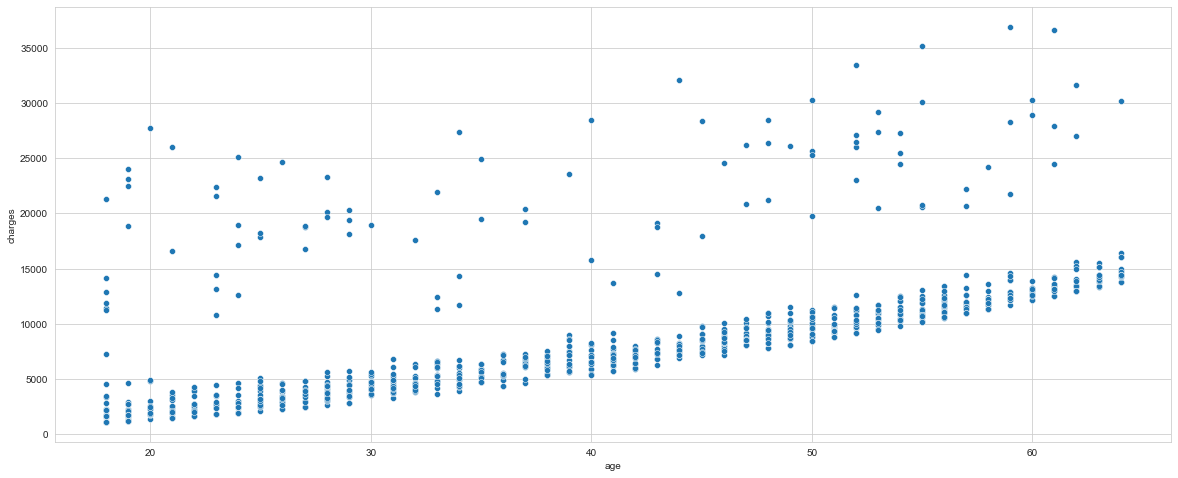

In [17]:
scatter_plot_age_charges(dataset=smoker_no_split)

Using an interval of 1.5 gives good results. We will use the upper interval to group the degree of medical problem if it is severe or not.

#### **Group according to degree of medical problem**

In [18]:
smoker_no_split["medical_problem"]=smoker_no_split["charges"].apply(lambda x: "severe" if x>17000 else "light")

For those values greater than $17,000 US, it will classify them as **severe medical problems.**

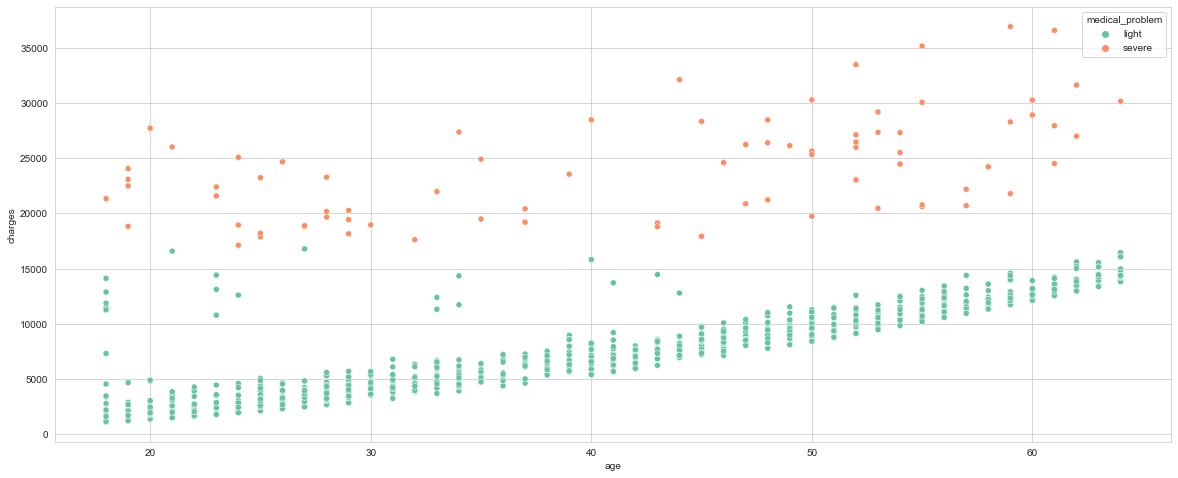

In [19]:
plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(data=smoker_no_split,x="age",y="charges",hue="medical_problem",palette="Set2")
plt.show()

### **Smoker yes split**

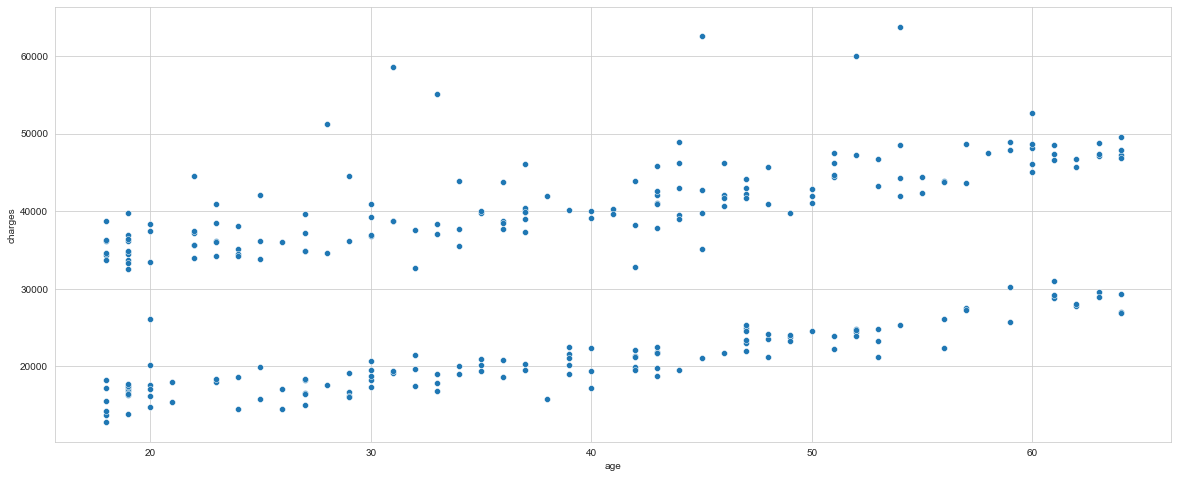

In [20]:
scatter_plot_age_charges(dataset=smoker_yes_split)

From a range higher than $32,000 USD we could create a new group, in a similar way to non-smokers but with a different range

In [21]:
smoker_yes_split["medical_problem"]=smoker_yes_split["charges"].apply(lambda x: "severe" if x > 32000 else "light")

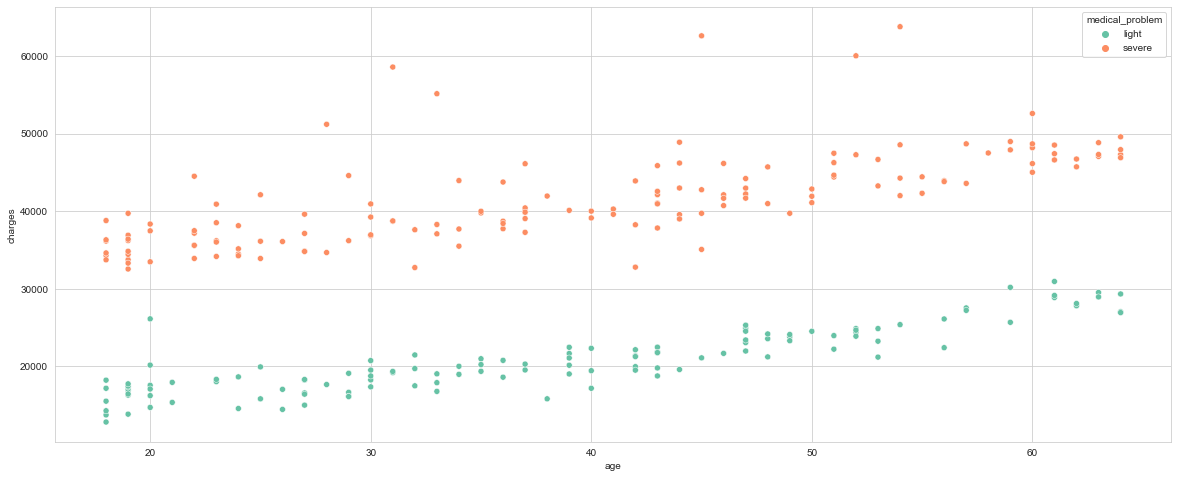

In [22]:
plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(data=smoker_yes_split,x="age",y="charges",hue="medical_problem",palette="Set2")
plt.show()

### **Replace Outliers Values**

In [23]:
smoker_yes_split["charges"]=smoker_yes_split["charges"].apply(lambda x: 48000 if x > 48000 else x)

We replace values greater than $48,000 and substitute them with that amount, since it is the closest value to the outliers.

##### **We create a new dataframe with the clean data**

In [24]:
df_clear=pd.concat([smoker_no_split,smoker_yes_split])

In [25]:
def boxplot():
    

    fig,(ax_box_1,ax_box_2)=plt.subplots(1,2,figsize=(20,8))
    
    ax_box_1.set_title("Adding new feature")

    sns.boxplot(data=df_clear,x="smoker",
            y="charges",
            hue="medical_problem",
            palette="Set2",
            ax=ax_box_1)

    ax_box_2.set_title("Without the new feature")
    sns.boxplot(data=df,
            x="smoker",
            y="charges",
            palette="Set2",
            ax=ax_box_2)
    plt.show()

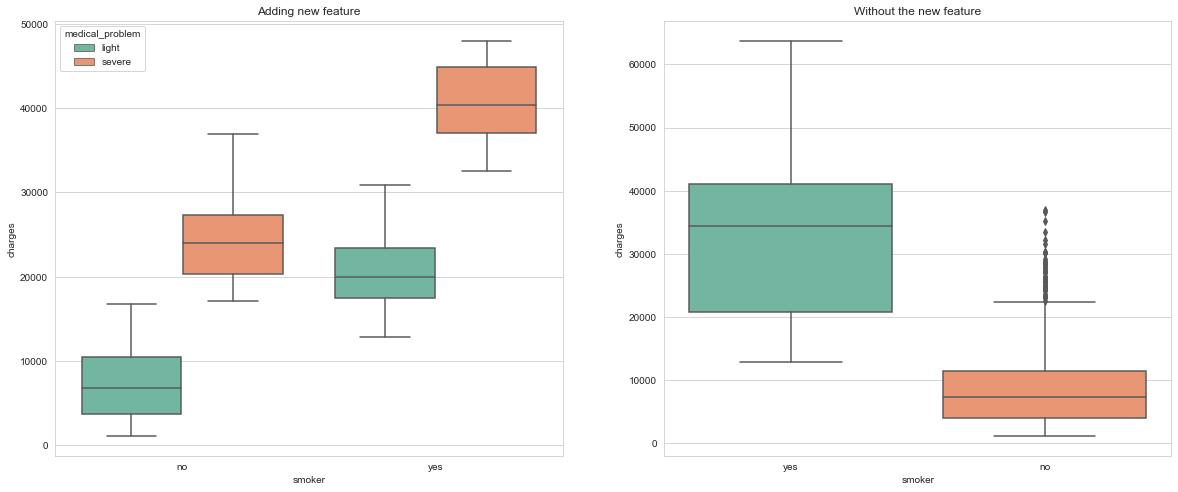

In [26]:
boxplot()

With the new variable we created, we solve the problem of outliers. Thanks to this variable, values that are out of the normal range can be better explained.

#### *We save the dataset with the clean data*

In [27]:
df_clear.to_csv("insurence_clearv2.csv",index=False)